Folium maps are displayed here:
https://nbviewer.org/github/0xrsfagundes/Certification/blob/main/IBM/Data%20Visualization%20with%20Python/Data%20Visualization%20with%20Python%20-%20Lab5.ipynb

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import folium


In [103]:
world_map = folium.Map()

world_map

In [104]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

world_map

In [105]:
world_map = folium.Map(location=[56.130, -106.35], zoom_start=8)

world_map

**Question**: Create a map of Mexico with a zoom level of 4.


In [106]:
world_map = folium.Map(location=[19.43, -99.13], zoom_start=4)

world_map

### A. Stamen Toner Maps

In [107]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')

# display map
world_map

### B. Stamen Terrain Maps


In [108]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Terrain')

# display map
world_map

**Question**: Create a map of Mexico to visualize its hill shading and natural vegetation. Use a zoom level of 6.


In [109]:
world_map = folium.Map(location=[19.43, -99.13], zoom_start=4,tiles='Stamen Terrain')

world_map

### Maps with Markers 

In [110]:
df_incidents = pd.read_csv('xls/Police_Department_Incidents_-_Previous_Year__2016_.csv')

df_incidents = df_incidents.head(100)

In [111]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [112]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [113]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [114]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

### Choropleth Maps

In [115]:
df_can = pd.read_excel('xls/Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)

df_can.drop(columns=['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'],inplace=True)


In [116]:
df_can = df_can.melt(id_vars='OdName',var_name='Year')

df_can.rename(columns={'OdName':'Country'}, inplace=True)

df_can_group = df_can.groupby('Country')['value'].sum()

df_can_group.head()

Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
Name: value, dtype: int64

In [125]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile of the world using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Join the dataframe with the geometries using the country name as the common identifier
merged = world.merge(df_can_group, left_on='name', right_on='Country')

merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,value
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",20609
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",20
2,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",241122
3,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",8490
4,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",3368


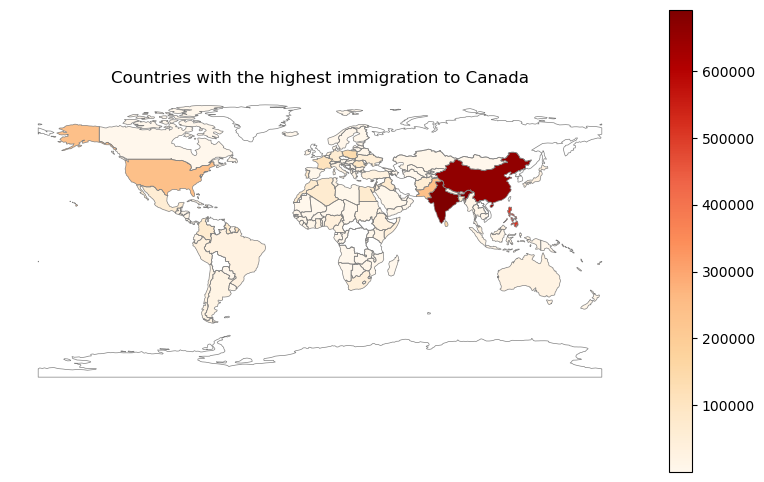

In [126]:
# Plot a choropleth map using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
merged.plot(column='value', cmap='OrRd', ax=ax, legend=True)

boundaries = world.boundary
boundaries.plot(ax=ax, color='gray',linewidth=0.5)

ax.set_title('Countries with the highest immigration to Canada')
ax.set_axis_off()
plt.show()